In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data Importing

In [2]:
data=pd.read_csv("datasets/train.csv")

In [3]:
#Brief summary of the Data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#Print first rows to inspect data
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

## Handle Missing Values

In [5]:
#We want to see how many values are missing in the dataset
print data["Age"].isnull().sum()
print data["Age"].median()

177
28.0


In [6]:
#Dataset with only the values that have an age
data_no_na=data.dropna(subset=["Age"]).copy()
data_no_na.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [7]:
#Replace values with the Median
data["Age"]=data["Age"].fillna(data["Age"].median())
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
title=data['Name'].apply(lambda x: x.split(',')[1].split('.')[0])
print title.value_counts()
data['title']=title

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Jonkheer          1
 Ms                1
 Sir               1
 Don               1
 Mme               1
 Capt              1
 Lady              1
 the Countess      1
Name: Name, dtype: int64


In [9]:
grouped = data.groupby(['Sex','Pclass','title'])
print grouped['Age'].median()

Sex     Pclass  title        
female  1        Dr              49.0
                 Lady            48.0
                 Miss            30.0
                 Mlle            24.0
                 Mme             24.0
                 Mrs             38.5
                 the Countess    33.0
        2        Miss            24.0
                 Mrs             32.0
                 Ms              28.0
        3        Miss            22.0
                 Mrs             29.0
male    1        Capt            70.0
                 Col             58.0
                 Don             40.0
                 Dr              38.0
                 Jonkheer        38.0
                 Major           48.5
                 Master           4.0
                 Mr              36.0
                 Sir             49.0
        2        Dr              38.5
                 Master           1.0
                 Mr              30.0
                 Rev             46.5
        3        Mas

# Data Visualization

          female  male
Survived     233   109
Dead          81   468


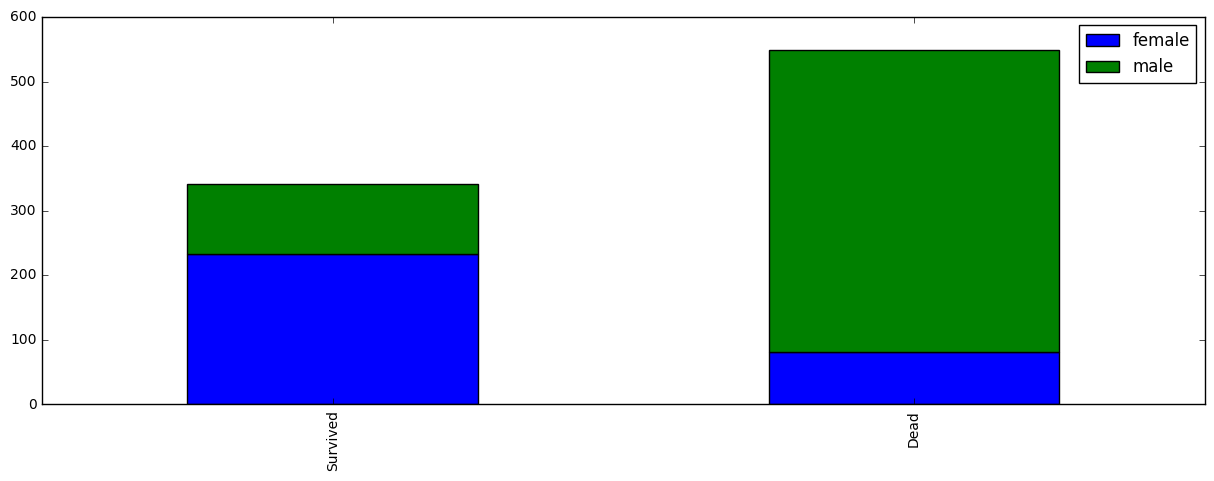

In [11]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
print df.head()
df.plot(kind='bar',stacked=True, figsize=(15,5))
plt.show()

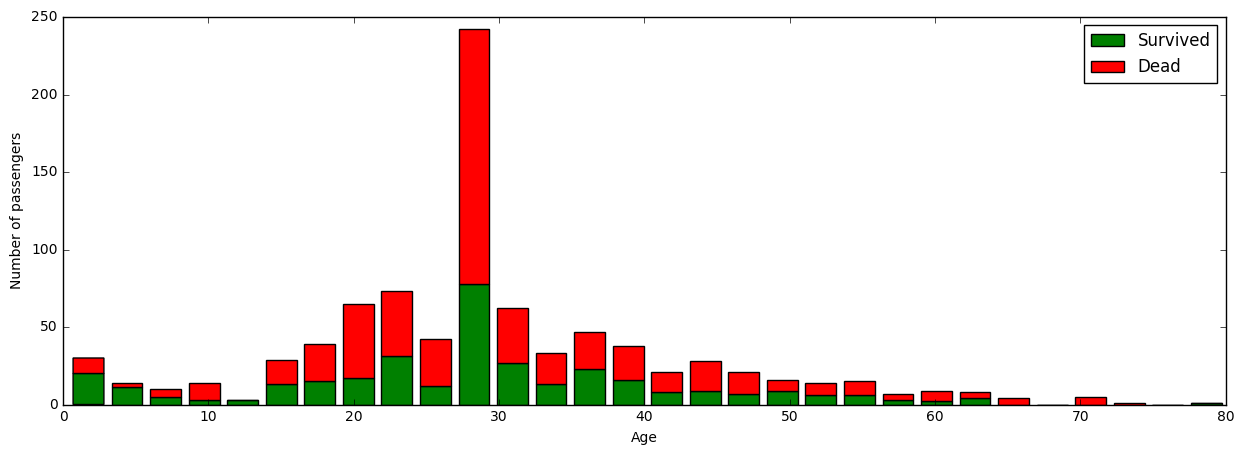

In [12]:
figure = plt.figure(figsize=(15,5))

plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

In [13]:
check=data['Age'].apply(lambda x: x.is_integer())
list_false=check[check==False].index.tolist()
print check.groupby(check).count()
data['Name'][list_false[1]]

Age
False     25
True     866
Name: Age, dtype: int64


'Caldwell, Master. Alden Gates'

In [14]:
survived_less10=data['Age'][(data['Age']<=10) & (data['Survived']==1)].count()
dead_less10=data['Age'][(data['Age']<=10) & (data['Survived']==0)].count()
total_less10=data['Age'][data['Age']<=10].count()

print "{0:.0f}%".format(survived_less10/float(total_less10) * 100)

59%


In [15]:
survived_more10=data['Age'][(data['Age']>10)&(data['Age']<50) & (data['Survived']==1)].count()
dead_more10=data['Age'][(data['Age']>10)&(data['Age']<50) & (data['Survived']==0)].count()
total_more10=data['Age'][(data['Age']>10)&(data['Age']<50)].count()

print "{0:.0f}%".format(survived_more10/float(total_more10) * 100)

37%


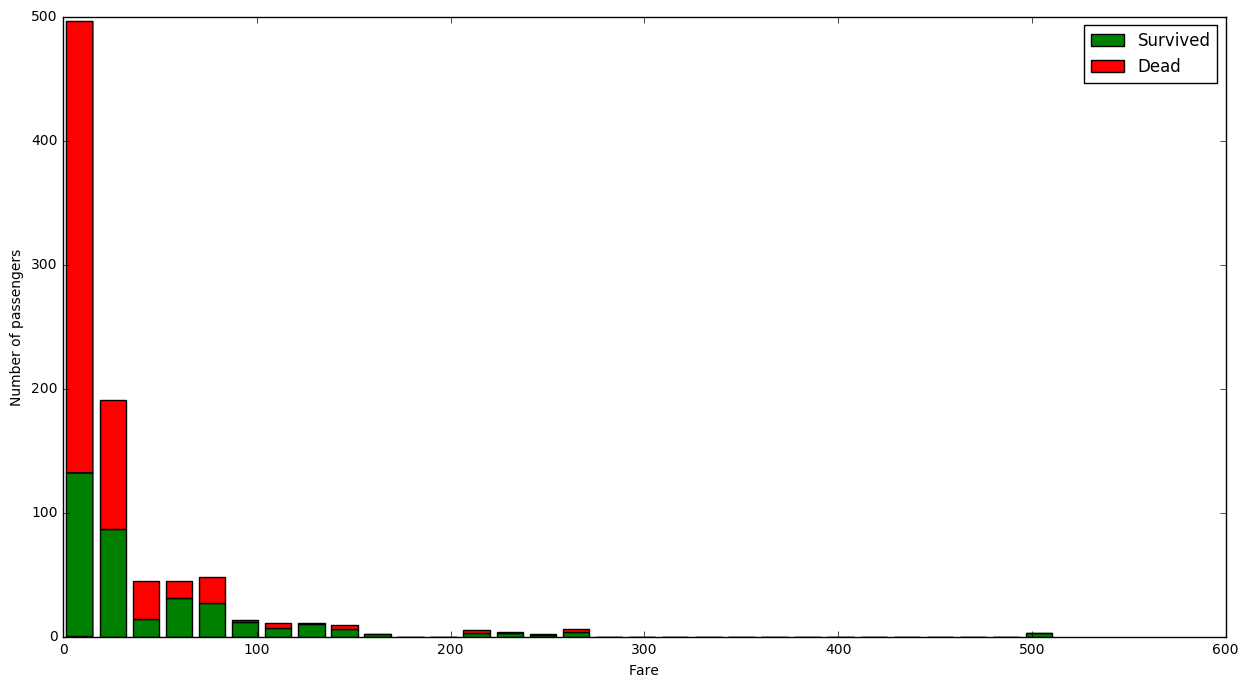

In [16]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

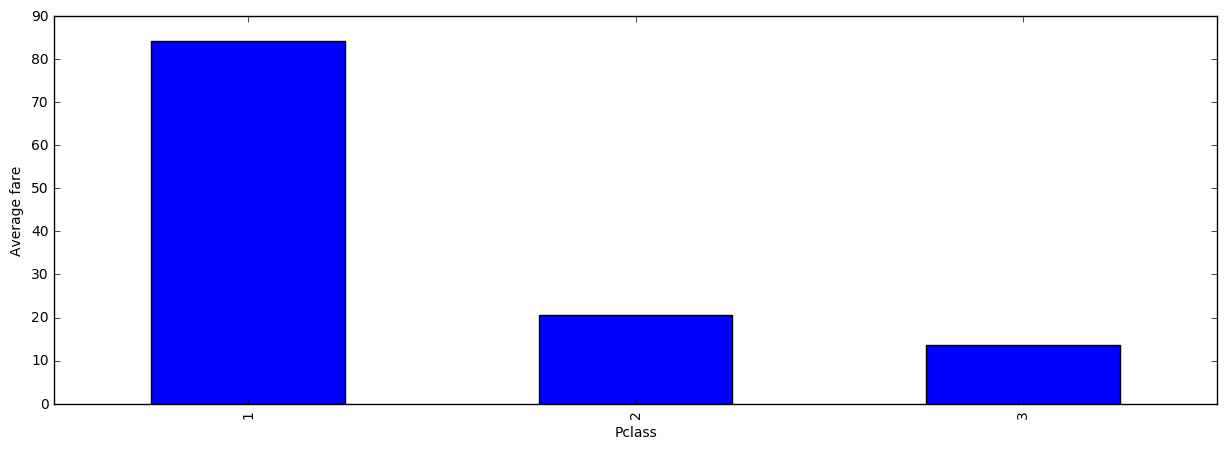

In [17]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,5), ax = ax)
plt.show()

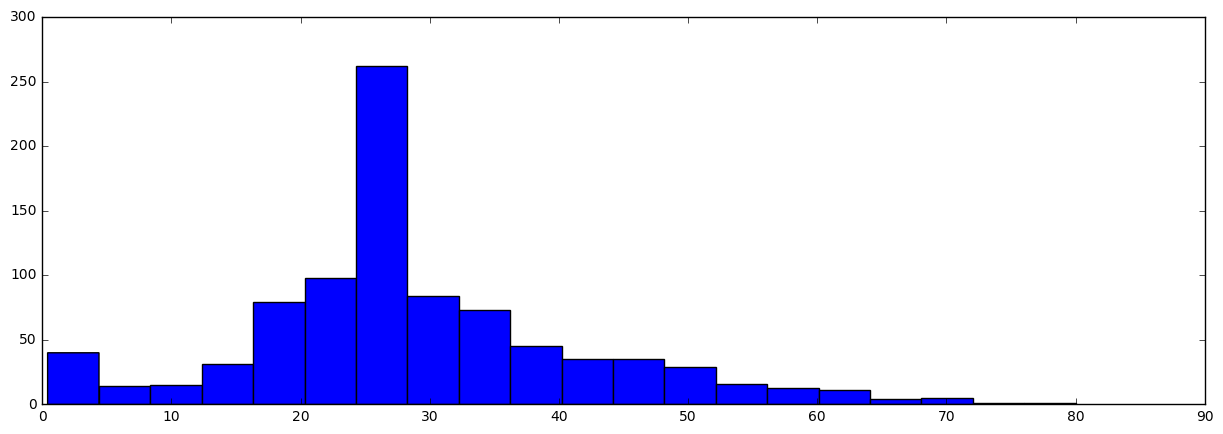

In [18]:
"""Signature: plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, 
        bottom=None, histtype=u'bar', align=u'mid', orientation=u'vertical', rwidth=None, log=False, 
            color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
"""
figure = plt.figure(figsize=(15,5))
plt.hist(data['Age'],bins=20,label='Age')
plt.show()

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## Handle Non-Numeric Values

In [20]:
#First we determine what are the possible values sex can take
print str(data["Sex"].unique()) +"\n"

#We get the number of each one
no_females=data["Sex"][data["Sex"]=="female"].count()
no_males=data["Sex"][data["Sex"]=="male"].count()

print "The number of females is: " + str(no_females)
print "The number of males is: " + str(no_males)

['male' 'female']

The number of females is: 314
The number of males is: 577


In [21]:
#Now we change it to a categorical variable where 0 is men and 1 is women
data.loc[data["Sex"]=="male","Sex"]=0
data.loc[data["Sex"]=="female","Sex"]=1

In [22]:
#I want to see all column values
print data.columns.values
#First we determine what are the possible values sex can take
print data["Embarked"].unique()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked' 'title']
['S' 'C' 'Q' nan]


In [23]:
#I want to see the frequency of values
print data["Embarked"].groupby(data["Embarked"]).count()
#Another way to do it is
#print data["Embarked"].value_counts()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


In [24]:
#Now we are going to replace the NAN values with S
data["Embarked"]=data["Embarked"].fillna("S")

In [25]:
dummEmb=pd.get_dummies(data['Embarked'],columns=['Embarked'],prefix='Embarked')
dummEmb.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [27]:
dumm=pd.get_dummies(data['title'],columns=['title'],prefix='title')
dumm.head()

,title_ Capt,title_ Col,title_ Don,title_ Dr,title_ Jonkheer,title_ Lady,title_ Major,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
frames=[data,dumm]
data_dummy=pd.concat(frames,axis=1)
print data_dummy.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1      0   
2                             Heikkinen, Miss. Laina   1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1      0   
4                           Allen, Mr. William Henry   0  35.0      0      0   

             Ticket     Fare         ...          title_ Master title_ Miss  \
0         A/5 21171   7.2500         ...                    0.0         0.0   
1          PC 17599  71.2833         ...                    0.0         0.0   
2  STON/O2. 3101282   7.9250         ...                    0.0  

In [29]:
frames=[data_dummy,dummEmb]
data_dummy=pd.concat(frames,axis=1)
print data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 33 columns):
PassengerId            891 non-null int64
Survived               891 non-null int64
Pclass                 891 non-null int64
Name                   891 non-null object
Sex                    891 non-null object
Age                    891 non-null float64
SibSp                  891 non-null int64
Parch                  891 non-null int64
Ticket                 891 non-null object
Fare                   891 non-null float64
Cabin                  204 non-null object
Embarked               891 non-null object
title                  891 non-null object
title_ Capt            891 non-null float64
title_ Col             891 non-null float64
title_ Don             891 non-null float64
title_ Dr              891 non-null float64
title_ Jonkheer        891 non-null float64
title_ Lady            891 non-null float64
title_ Major           891 non-null float64
title_ Master          891 non-

In [30]:
print data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 33 columns):
PassengerId            891 non-null int64
Survived               891 non-null int64
Pclass                 891 non-null int64
Name                   891 non-null object
Sex                    891 non-null object
Age                    891 non-null float64
SibSp                  891 non-null int64
Parch                  891 non-null int64
Ticket                 891 non-null object
Fare                   891 non-null float64
Cabin                  204 non-null object
Embarked               891 non-null object
title                  891 non-null object
title_ Capt            891 non-null float64
title_ Col             891 non-null float64
title_ Don             891 non-null float64
title_ Dr              891 non-null float64
title_ Jonkheer        891 non-null float64
title_ Lady            891 non-null float64
title_ Major           891 non-null float64
title_ Master          891 non-

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


# Making predictions

In [32]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.cross_validation import KFold
from sklearn import cross_validation

In [33]:
#First we select the features
features=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]#, "Embarked"]
kf = KFold(data.shape[0], n_folds=3, random_state=1)

In [34]:
#We are going to use Linear Regression as the algorithm used to make predictions
#We need to be sure to spell it correctly and use Upper Case when appropiate
alg=LinearRegression()

In [35]:
predictions=[]
for train, test in kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_features = (data[features].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = data["Survived"].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_features, train_target)
    # We can now make predictions on the test fold
    test_features = alg.predict(data[features].iloc[test,:])
    predictions.append(test_features)

In [36]:
# The predictions are in three separate numpy arrays.  Concatenate them into one.  
# We concatenate them on axis 0, as they only have one axis.
predictions = np.concatenate(predictions, axis=0)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0

In [37]:
boolean=data["Survived"]==predictions
#True values are taken as "1" so we can sum them
#Float is used so we don't get an integer as a response
accuracy=sum(boolean)/float(predictions.shape[0])

#We print it with 2 decimal values
print "{0:.2f}%".format(accuracy * 100)

78.45%


In [38]:
#Try with a Logistic Regression to see if we can improve the accuracy
alg2 = LogisticRegression(random_state=1)

#We will use a Scikit  function that returns Array of scores of the estimator for each run of the cross validation.
scores = cross_validation.cross_val_score(alg2, data[features], data["Survived"], cv=3)

print "{0:.2f}%".format(scores.mean() * 100)
print scores

79.01%
[ 0.79461279  0.78787879  0.78787879]


In [39]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [40]:
alg3 = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]#, "Embarked"]

kf = cross_validation.KFold(data.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg3, data[predictors], data["Survived"], cv=3)

print "{0:.2f}%".format(scores.mean() * 100)

79.24%


In [41]:
#Using other parameters
alg3 = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
kf = cross_validation.KFold(data.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg3, data[predictors], data["Survived"], cv=3)

print "{0:.2f}%".format(scores.mean() * 100)

81.59%


In [42]:
# Generating a familysize column
data["FamilySize"] = data["SibSp"] + data["Parch"]

# The .apply method generates a new series
data["NameLength"] = data["Name"].apply(lambda x: len(x))

In [43]:
data["NameLength"].head()

0    23
1    51
2    22
3    44
4    24
Name: NameLength, dtype: int64

In [44]:
data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [45]:
import re
# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = data["Name"].apply(get_title)
print(pd.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print pd.value_counts(titles)

# Add in the title column.
data["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [46]:
import operator

# A dictionary mapping family name to id
family_id_mapping = {}

# A function to get the id given a row
def get_family_id(row):
    # Since the last name has a "," we can get the last name by splitting whenever python finds this character in each row
    last_name = row["Name"].split(",")[0]
    # The family id is made of the last name and the # of members in each family
    # So for a family of 1 member we would have: lastName1
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    
    # We check for the id in the dictionary created
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1 # This is for the first family id
        else:
            # Get the maximum id from the mapping and add one to it if we don't have an id
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id

    return family_id_mapping[family_id]

# Get the family ids with the apply method
family_ids = data.apply(get_family_id, axis=1)

# There are a lot of family ids, so we'll compress all of the families under 3 members into one code.
family_ids[data["FamilySize"] < 3] = -1

# Print the count of each unique id.
print pd.value_counts(family_ids).head()

data["FamilyId"] = family_ids

-1      800
 14       8
 149      7
 63       6
 50       6
dtype: int64


## Feature Selection

In [47]:
from sklearn.feature_selection import SelectKBest, f_classif

In [48]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "FamilySize", "Title", "FamilyId"]#Embarked
# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(data[predictors], data["Survived"])

SelectKBest(k=5, score_func=<function f_classif at 0x0A7D3E30>)

In [49]:
# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

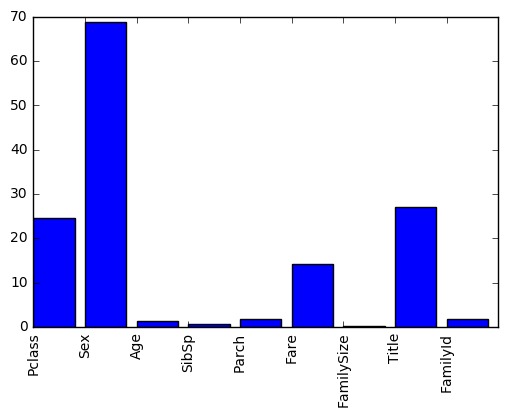

In [50]:
%matplotlib inline
# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [51]:
# Pick only the four best features.
predictors = ["Pclass", "Sex", "Fare", "Title"]

In [52]:
alg4 = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)
kf = cross_validation.KFold(data.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg4, data[predictors], data["Survived"], cv=kf)

print "{0:.2f}%".format(scores.mean() * 100)

81.93%
